# part 1


In [1]:
import pandas as pd


In [2]:
diabetes = pd.read_csv("pima-indians-diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

/home/thesohankathait/anaconda3/envs/latest/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
 diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press= tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_predigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')


In [44]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
assigned_group

_VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [13]:

# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [14]:
#continuous column to categorical column

In [15]:
#feature engineering
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline

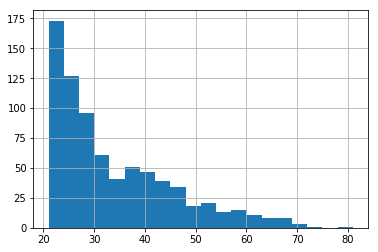

In [17]:
diabetes['Age'].hist(bins=20)

In [18]:

age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70])

In [19]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_predigree,age_bucket]

In [20]:
# train test split

In [21]:
x_data = diabetes.drop('Class',axis=1)

In [22]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


In [23]:
labels = diabetes['Class']

In [24]:
#labels

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

# part 2

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,
                                                y=y_train,
                                                batch_size=10,
                                                num_epochs=1000,
                                                shuffle = True)

In [29]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                     n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwz58r7w8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd7ff3e46d8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpwz58r7w8/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 382.29
INFO:tensorflow:loss = 5.712449, step = 101 (0.263 sec)
INFO:tensorflow:global_step/sec: 538.745
INFO:tensorflow:loss = 5.6976366, step = 201 (0.186 sec)
INFO:tensorflow:global_step/sec: 445.729
INFO:tensorflow:loss = 5.8941565, step = 301 (0.225 sec)
INFO:tensorflow:global_step/sec: 345.839
INFO:tensorflow:loss = 4.608768, step = 401 (0.288 sec)
INFO:tensorflow:global_step/sec: 434.091
INFO:tensorflow:loss = 5.6608043, step = 501 (0.232 sec)
INFO:tensorflow:global_step/sec: 444.618
INFO:tensorflow:loss = 3.8787649, step = 601 (0.224 sec)
INFO:tensorflow:global_step/sec: 375.732
INFO:tensorflow:loss

In [31]:
eval_input = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                y=y_test,
                                                batch_size=10,
                                                num_epochs=1,
                                                shuffle=False)


In [32]:
results = model.evaluate(eval_input)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-27-15:05:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwz58r7w8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-27-15:05:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7316017, accuracy_baseline = 0.64935064, auc = 0.8032099, auc_precision_recall = 0.65705943, average_loss = 0.5247766, global_step = 1000, label/mean = 0.35064936, loss = 5.0509744, precision = 0.62666667, prediction/mean = 0.38577798, recall = 0.5802469
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpwz58r7w8/model.ckpt-1000


In [33]:
results

{'accuracy': 0.7316017,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8032099,
 'auc_precision_recall': 0.65705943,
 'average_loss': 0.5247766,
 'label/mean': 0.35064936,
 'loss': 5.0509744,
 'precision': 0.62666667,
 'prediction/mean': 0.38577798,
 'recall': 0.5802469,
 'global_step': 1000}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwz58r7w8/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [38]:
my_pred

[{'logits': array([0.12591708], dtype=float32),
  'logistic': array([0.53143775], dtype=float32),
  'probabilities': array([0.46856225, 0.53143775], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.71639013], dtype=float32),
  'logistic': array([0.67181164], dtype=float32),
  'probabilities': array([0.32818842, 0.67181164], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.38307613], dtype=float32),
  'logistic': array([0.4053852], dtype=float32),
  'probabilities': array([0.5946148, 0.4053852], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6794262], dtype=float32),
  'logistic': array([0.3363894], dtype=float32),
  'probabilities': array([0.66361064, 0.3363894 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7971377], dtype=float32),
  'logistic': a

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10,10],
                                       feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpooz2b2h9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd7fecc7b38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [55]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_predigree,embedded_group_col,age_bucket]

In [56]:
feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _EmbeddingColumn(categorical_column=_VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0), dimension=4, combiner='mean', layer_creator=<function embedding_column.<locals>._cre

In [57]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10,10],
                                       feature_columns=feat_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_re1eoxz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fd7aa7ca0b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [58]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_re1eoxz/model.ckpt.
INFO:tensorflow:loss = 7.0541234, step = 1
INFO:tensorflow:global_step/sec: 295.319
INFO:tensorflow:loss = 6.110704, step = 101 (0.342 sec)
INFO:tensorflow:global_step/sec: 348.356
INFO:tensorflow:loss = 8.314451, step = 201 (0.289 sec)
INFO:tensorflow:global_step/sec: 380.195
INFO:tensorflow:loss = 6.4276943, step = 301 (0.260 sec)
INFO:tensorflow:global_step/sec: 514.631
INFO:tensorflow:loss = 8.879718, step = 401 (0.195 sec)
INFO:tensorflow:global_step/sec: 347.65
INFO:tensorflow:loss = 2.8785205, step = 501 (0.288 sec)
INFO:tensorflow:global_step/sec: 418.114
INFO:tensorflow:loss = 5.1858435, step = 601 (0.241 sec)
INFO:tensorflow:global_step/sec: 450.643
INFO:tensorflow:loss

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test,
                                                     y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [60]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-27-18:11:02
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_re1eoxz/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-27-18:11:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.83308643, auc_precision_recall = 0.7119014, average_loss = 0.48422208, global_step = 1000, label/mean = 0.35064936, loss = 4.6606374, precision = 0.6375, prediction/mean = 0.37784842, recall = 0.6296296
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_re1eoxz/model.ckpt-1000


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83308643,
 'auc_precision_recall': 0.7119014,
 'average_loss': 0.48422208,
 'label/mean': 0.35064936,
 'loss': 4.6606374,
 'precision': 0.6375,
 'prediction/mean': 0.37784842,
 'recall': 0.6296296,
 'global_step': 1000}